In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
%matplotlib inline

In [2]:
f_birth = pd.read_csv('daily-total-female-births-in-cal.csv',index_col=[0],parse_dates =[0])

In [3]:
f_birth.head()

,"Daily total female births in California, 1959"
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [4]:
type(f_birth)

pandas.core.frame.DataFrame

In [5]:
series_value = f_birth.values

In [6]:
type(series_value)

numpy.ndarray

In [7]:
f_birth.size

366

In [8]:
f_birth.tail()

,"Daily total female births in California, 1959"
Date,
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50
Daily total female births in California,1959


In [9]:
f_birth.describe()

,"Daily total female births in California, 1959"
count,366.000000
mean,47.218579
std,100.472534
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,1959.000000


In [10]:
f_birth = f_birth[0:365]

In [11]:
f_birth.describe()

,"Daily total female births in California, 1959"
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


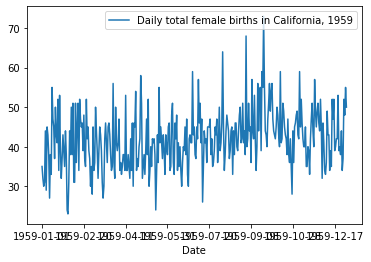

In [12]:
f_birth.plot()

In [14]:
f_birth_mean = f_birth.rolling(window = 3).mean()

In [15]:
f_birth_MAtrain = f_birth[0:330]

In [16]:
f_birth_MAtrain

,"Daily total female births in California, 1959"
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-11-22,40
1959-11-23,57
1959-11-24,49


In [17]:
f_birth_MAtrain.size

330

In [26]:
f_birth_MA_model = ARMA(f_birth_MAtrain,order=(0,5))
res = f_birth_MA_model.fit()

C:\Users\Toby\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [27]:
f_birth_MA_forecast = res.predict(start = 0 ,end = 30)

In [28]:
f_birth_MA_forecast

1959-01-01    41.862524
1959-01-02    40.440585
1959-01-03    39.315601
1959-01-04    38.440732
1959-01-05    38.251597
1959-01-06    40.536143
1959-01-07    39.135423
1959-01-08    41.296339
1959-01-09    41.886061
1959-01-10    41.576879
1959-01-11    38.756282
1959-01-12    39.824439
1959-01-13    39.130247
1959-01-14    42.982389
1959-01-15    43.434157
1959-01-16    43.720593
1959-01-17    41.689449
1959-01-18    43.395269
1959-01-19    42.462021
1959-01-20    42.034987
1959-01-21    43.575170
1959-01-22    41.549560
1959-01-23    43.513242
1959-01-24    42.053820
1959-01-25    40.415686
1959-01-26    39.757552
1959-01-27    41.324480
1959-01-28    40.931692
1959-01-29    40.274275
1959-01-30    41.602494
1959-01-31    41.169504
Freq: D, dtype: float64

In [29]:
type(f_birth_mean)

pandas.core.frame.DataFrame

In [30]:
f_birth_mean = f_birth.rolling(window = 3).mean()

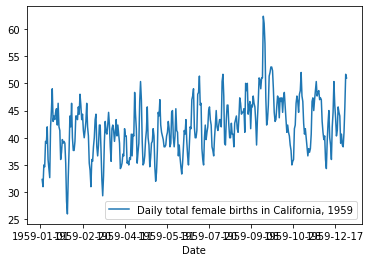

In [31]:
f_birth_mean.plot()

In [32]:
value = pd.DataFrame(series_value)

In [33]:
type(value)

pandas.core.frame.DataFrame

In [34]:
birth_df = pd.concat([value, value.shift(1)],axis=1)

In [35]:
birth_df.head()

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [36]:
birth_df.columns =['Acutal_birth','Forecast_birth']

In [37]:
birth_df.head()

,Acutal_birth,Forecast_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [38]:
birth_test = birth_df[1:365]

In [39]:
birth_test.head()

,Acutal_birth,Forecast_birth
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0


In [40]:
birth_test.tail()

,Acutal_birth,Forecast_birth
360,37,34.0
361,52,37.0
362,48,52.0
363,55,48.0
364,50,55.0


In [41]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [42]:
birth_error = mean_squared_error(birth_test.Acutal_birth,birth_test.Forecast_birth)

In [43]:
birth_error

84.22252747252747

In [44]:
np.sqrt(birth_error) #均方根誤差Root Mean Square Error

9.177283229394606

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

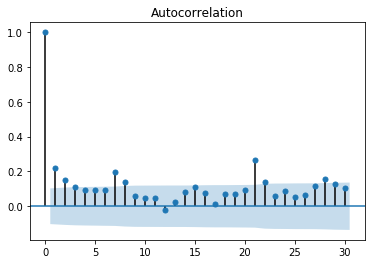

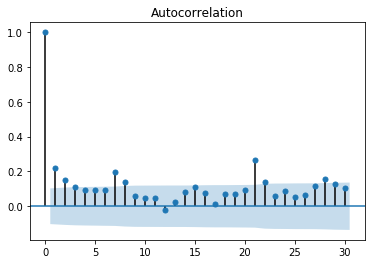

In [46]:
plot_acf(f_birth, lags = 30,alpha= 0.05) # to identify q

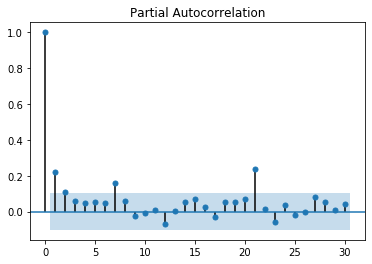

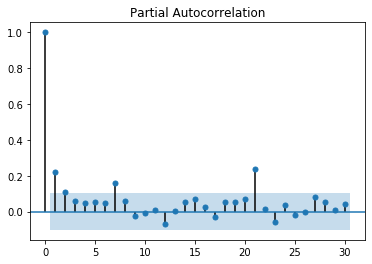

In [48]:
plot_pacf(f_birth, lags = 30,alpha= 0.05)#to identify p

In [49]:
f_birth.size

365

In [50]:
birth_train = f_birth[0:330]
birth_test = f_birth[330:365]

In [51]:
birth_train.size

330

In [52]:
birth_test.size

35

In [53]:
from statsmodels.tsa.arima_model import ARIMA

In [54]:
birth_model = ARIMA(birth_train, order=(2,1,3))

C:\Users\Toby\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Toby\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [55]:
birth_model_fit = birth_model.fit()

In [56]:
birth_model_fit.aic # aic越小代表model 越好

2230.94824901245

In [57]:
birth_forecast = birth_model_fit.forecast(steps = 35)[0]

In [58]:
birth_forecast

array([45.30384103, 46.31074405, 43.64963085, 44.59236349, 46.49718319,
       44.34363874, 44.09002194, 46.34404451, 45.07550376, 43.88123853,
       45.95230735, 45.69592493, 43.97415625, 45.45691696, 46.10393962,
       44.31151816, 44.99252023, 46.26036906, 44.79363348, 44.6649282 ,
       46.1859242 , 45.30655668, 44.5334176 , 45.94690945, 45.74863534,
       44.60583748, 45.6336096 , 46.05006   , 44.84544317, 45.33715779,
       46.18242208, 45.1860684 , 45.13004688, 46.15790218, 45.55103601])

In [59]:
birth_test

,"Daily total female births in California, 1959"
Date,
1959-11-27,51
1959-11-28,46
1959-11-29,44
1959-11-30,52
1959-12-01,45
1959-12-02,32
1959-12-03,46
1959-12-04,41
1959-12-05,34


In [60]:
np.sqrt(mean_squared_error(birth_test,birth_forecast))

6.860031644571154